In [8]:
import os
os.environ['NUMBA_DISABLE_JIT'] = "1"

from PySDM.physics import si
from PySDM.initialisation.sampling.spectral_sampling import ConstantMultiplicity
from PySDM.initialisation.spectra.exponential import Exponential

n_sd = 2 ** 15
initial_spectrum = Exponential(norm_factor=8.39e12, scale=1.19e5 * si.um ** 3)
attributes = {}
attributes['volume'], attributes['multiplicity'] = ConstantMultiplicity(initial_spectrum).sample(n_sd)

In [ ]:
import numpy as np
from PySDM import Builder
from PySDM.environments import Box
from PySDM.dynamics import Coalescence
from PySDM.dynamics.collisions.collision_kernels import Golovin
from PySDM.backends import JAX, CPU
from PySDM.products import ParticleVolumeVersusRadiusLogarithmSpectrum

radius_bins_edges = np.logspace(np.log10(10 * si.um), np.log10(5e3 * si.um), num=32)

env = Box(dt=1 * si.s, dv=1e6 * si.m ** 3)
builder = Builder(n_sd=n_sd, backend=CPU(), environment=env)
builder.add_dynamic(Coalescence(collision_kernel=Golovin(b=1.5e3 / si.s), adaptive=False))
products = [ParticleVolumeVersusRadiusLogarithmSpectrum(radius_bins_edges=radius_bins_edges, name='dv/dlnr')]
particulator = builder.build(attributes, products)

print(particulator.attributes.keys())
print(particulator.attributes['volume'].data)

dict_keys(['multiplicity', 'signed water mass', 'water mass', 'cell id', 'volume'])
[3.00579754e-18 6.63746385e-18 1.02692410e-17 ... 1.11357449e-12
 1.16550703e-12 1.25977547e-12]


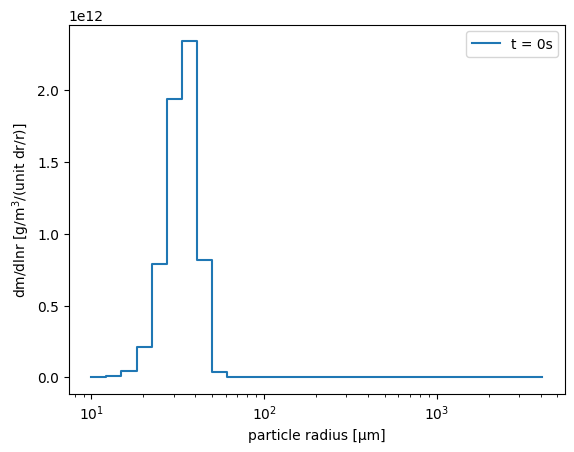

In [10]:
from matplotlib import pyplot

for step in [0]: #, 1200, 2400, 3600]:
    particulator.run(step - particulator.n_steps)
    pyplot.step(
        x=radius_bins_edges[:-1] / si.um,
        y=particulator.formulae.particle_shape_and_density.volume_to_mass(
            particulator.products['dv/dlnr'].get()[0]
        ) / si.g,
        where='post', label=f"t = {step}s"
    )

pyplot.xscale('log')
pyplot.xlabel('particle radius [µm]')
pyplot.ylabel("dm/dlnr [g/m$^3$/(unit dr/r)]")
pyplot.legend()
pyplot.savefig('readme.png')

In [11]:
32768

31

31